In [2]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

from termcolor import colored

In [44]:
class SARSA:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, Q, alpha, gamma):

        error = reward + (gamma*Q[next_action][next_state[0],next_state[1]]) - Q[curr_action][curr_state[0],curr_state[1]]
        Q[curr_action][curr_state[0],curr_state[1]] = Q[curr_action][curr_state[0],curr_state[1]] + alpha*error
        
        return Q
    
    
    def select_action(self,epsilon, state, Q, env):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    
    def sarsa(self, gamma, alpha, epsilon, episodes, env, goal):
        
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])
    
        goal_pos = env.set_goal(goal)
#         Q[:,goal_pos[0],goal_pos[1]] = 10
#         print(np.amax(Q))


        Terminal_state = goal_pos

        steps = np.zeros([episodes])
        avg_reward = np.zeros([episodes])

        
        for episode in range(episodes):

            curr_state = env.reset()
#             curr_state = env.get_state()


            curr_action = self.select_action(epsilon, curr_state, Q, env)
#             curr_action = env.actual_action(sel_action)

            while True:

                next_state, reward = env.step(curr_state, curr_action)
                
                next_action = self.select_action(epsilon, next_state, Q, env)
#                 next_action = env.actual_action(sel_next_action)

#                 print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)
                
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, Q, alpha, gamma)
                
        #steps[epis]
                
                
                curr_state = next_state
                curr_action = next_action
                
                steps[episode]+=1
                avg_reward[episode] += reward


                if curr_state == goal_pos:
#                     if episode%50==0:
#                         print(p)
#                         steps[p] = stp/50
#                         avg_reward[p] = rew/50
#                         p+=1
#                         stp=0
#                         rew=0

                    print("Steps =======================", steps[episode])
                    print("reward=======================", avg_reward[episode])
                    break
        print("-----------One exp done-----------")
        return avg_reward, steps, Q

In [61]:

def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()

# To display the policy learn't
def plot_policy(goal_pos, pol):
    plt.rcParams['figure.figsize'] = [7,7]
    fig, ax = plt.subplots()

    ax.matshow(pol)
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                ax.text(i,j,'G', va='center', ha='center')
            else:
                c = int(pol[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')
# plot_policy([0,11],Q)

Steps ======================= 1944.0
reward======================= -42.0
Steps ======================= 749.0
reward======================= -23.0
Steps ======================= 976.0
reward======================= -13.0
Steps ======================= 42.0
reward======================= -10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 206.0
reward======================= 6.0
Steps ======================= 189.0
reward======================= 7.0
Steps ======================= 259.0
reward======================= 6.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 152.0
reward======================= 8.0
Steps ======================= 61.0
reward======================= 8.0
Steps ======================= 114.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======

Steps ======================= 74.0
reward======================= 8.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= -13.0
Steps ======================= 31.0
reward======================= 2.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 1.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 8.0
Steps ======================= 132.0
reward======================= 10.0
Steps ======================= 75.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= -11.0
Steps ======================= 55.0
reward======================= 10.0
Steps ================

Steps ======================= 44.0
reward======================= -1.0
Steps ======================= 33.0
reward======================= -15.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 8.0
Steps ======================= 106.0
reward======================= 5.0
Steps ======================= 55.0
reward======================= 8.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= -3.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 92.0
reward======================= -1.0
Steps ======================= 40.0
reward======================= 7.0
Steps =================

Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 8.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 8.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 3.0
Steps ======================= 36.0
reward======================= 10.0
Steps =====================

Steps ======================= 65.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ================

Steps ======================= 28.0
reward======================= 7.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ================

Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= -6.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps =================

Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 8.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ===============

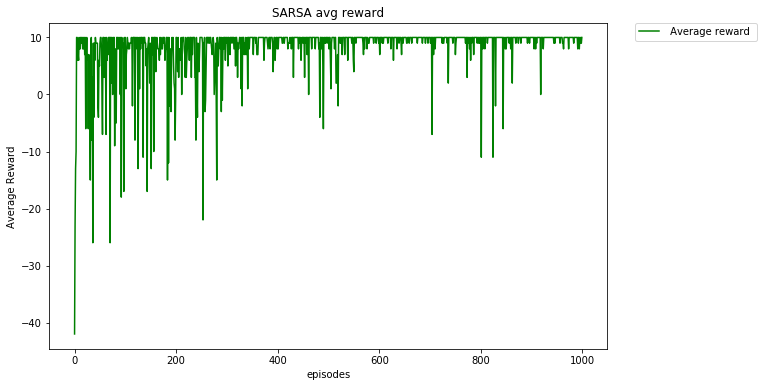

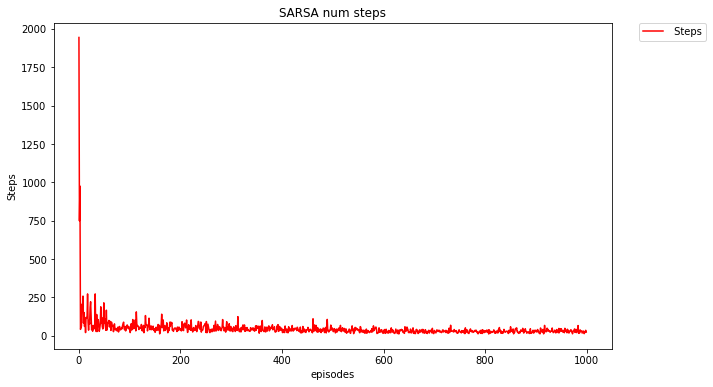

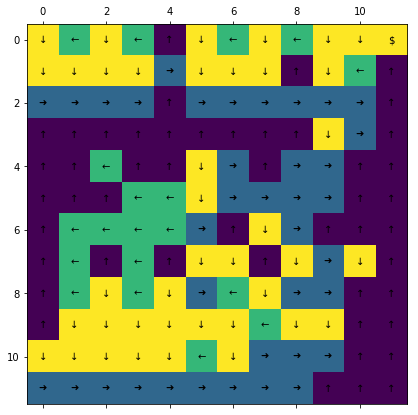

In [45]:
def main():    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
    
#     goal_pos = [7,8]
    goal_pos = [0,11]
    env = gym.make('gym_pdw:pdw-v0')
    sr = SARSA()
    avg_reward, steps, Q = sr.sarsa(gamma, alpha, epsilon, episodes, env, 'A')
    policy = np.argmax(Q,axis=0)
    plot_sarsa(avg_reward, steps, episodes)
    plot_policy(goal_pos,policy)    

main()

In [22]:
avg_reward, steps, Q

NameError: name 'avg_reward' is not defined

Steps ======================= 97.0
reward======================= -1.0
Steps ======================= 168.0
reward======================= -28.0
Steps ======================= 156.0
reward======================= -3.0
Steps ======================= 3959.0
reward======================= -80.0
Steps ======================= 79.0
reward======================= -2.0
Steps ======================= 575.0
reward======================= 7.0
Steps ======================= 332.0
reward======================= 7.0
Steps ======================= 219.0
reward======================= -2.0
Steps ======================= 80.0
reward======================= 6.0
Steps ======================= 102.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 5.0
Steps ======================= 23.0
reward======================= -5.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 138.0
reward======================= 7.0
Steps =========

reward======================= 9.0
Steps ======================= 32.0
reward======================= 4.0
Steps ======================= 83.0
reward======================= 8.0
Steps ======================= 70.0
reward======================= 7.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 127.0
reward======================= 6.0
Steps ======================= 47.0
reward======================= -3.0
Steps ======================= 39.0
reward======================= 6.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 2.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= -11.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 134.0
reward==================

reward======================= 9.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 72.0
reward======================= 5.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 3.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 35.0
reward======================= 7.0
Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= -5.0
Steps ======================= 61.0
reward====================

Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= -4.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 9.0
Steps =================

reward======================= 5.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= -1.0
Steps ======================= 50.0
reward======================= 9.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 35.0
reward================

reward======================= 9.0
Steps ======================= 48.0
reward======================= 2.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 101.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= -4.0
Steps ======================= 156.0
reward======================= -4.0
Steps ======================= 45.0
reward======================= 8.0
Steps ======================= 96.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 8.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 3.0
Steps ======================= 141.0
reward======================= 7.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 68.0
reward===================

reward======================= 7.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 100.0
reward======================= 9.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 30.0
reward======================= 8.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 183.0
reward======================= 10.0
Steps ======================= 82.0
reward======================= -3.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 4.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= -4.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 29.0
reward=================

reward======================= 6.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= -4.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 5.0
Steps ======================= 25.0
reward======================= 0.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 47.0
reward=================

Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 6.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 6.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 9.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 8.0
Steps ======================= 39.0
reward======================= 6.0
Steps ======================= 18.0
reward======================= 9.0
Steps ======================

Steps ======================= 36.0
reward======================= 0.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 140.0
reward======================= 10.0
Steps ======================= 93.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 8.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 98.0
reward======================= 9.0
Steps ======================= 38.0
reward======================= 1.0
Steps ======================= 130.0
reward======================= 2.0
Steps ====================

Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 84.0
reward======================= 8.0
Steps ======================= 120.0
reward======================= 4.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= -9.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 103.0
reward======================= 8.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= -5.0
Steps ======================= 54.0
reward======================= 8.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 9.0
Steps =================

Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= -3.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 6.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ==================

reward======================= 9.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 5.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 8.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 8.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 17.0
reward===================

reward======================= 1.0
Steps ======================= 57.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 114.0
reward======================= 3.0
Steps ======================= 115.0
reward======================= 9.0
Steps ======================= 106.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= -2.0
Steps ======================= 159.0
reward======================= 5.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 86.0
reward======================= 1.0
Steps ======================= 37.0
reward======================= 3.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 82.0
reward=================

reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 9.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 75.0
reward======================= -4.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 113.0
reward======================= -6.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 50.0
reward=================

reward======================= 10.0
Steps ======================= 34.0
reward======================= -2.0
Steps ======================= 55.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= -2.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 79.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 5.0
Steps ======================= 39.0
reward======================= 3.0
Steps ======================= 27.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 82.0
reward==================

Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 1.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 8.0
Steps =================

reward======================= 10.0
-----------One exp done-----------
Steps ======================= 1444.0
reward======================= -59.0
Steps ======================= 506.0
reward======================= -27.0
Steps ======================= 337.0
reward======================= -3.0
Steps ======================= 394.0
reward======================= -8.0
Steps ======================= 184.0
reward======================= -10.0
Steps ======================= 96.0
reward======================= 5.0
Steps ======================= 104.0
reward======================= 10.0
Steps ======================= 940.0
reward======================= -32.0
Steps ======================= 91.0
reward======================= -18.0
Steps ======================= 351.0
reward======================= 1.0
Steps ======================= 965.0
reward======================= -3.0
Steps ======================= 56.0
reward======================= -20.0
Steps ======================= 2348.0
reward======================= -6.0
Step

Steps ======================= 90.0
reward======================= -1.0
Steps ======================= 91.0
reward======================= 7.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 4.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= -7.0
Steps ======================= 19.0
reward======================= -3.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 99.0
reward======================= 9.0
Steps ======================= 72.0
reward======================= -4.0
Steps ======================= 65.0
reward======================= 8.0
Steps ======================= 76.0
reward======================= 1.0
Steps =====================

Steps ======================= 56.0
reward======================= -5.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 130.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= -2.0
Steps ======================= 33.0
reward======================= 2.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 77.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ===============

reward======================= 10.0
Steps ======================= 23.0
reward======================= 6.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 8.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 110.0
reward======================= 5.0
Steps ======================= 108.0
reward======================= 1.0
Steps ======================= 59.0
reward======================= 9.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 2.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 20.0
reward==================

reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= -1.0
Steps ======================= 27.0
reward======================= 8.0
Steps ======================= 17.0
reward======================= 6.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 21.0
reward=================

Steps ======================= 87.0
reward======================= 10.0
Steps ======================= 94.0
reward======================= -17.0
Steps ======================= 112.0
reward======================= 3.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 93.0
reward======================= -15.0
Steps ======================= 131.0
reward======================= 9.0
Steps ======================= 71.0
reward======================= 6.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 4.0
Steps ======================= 50.0
reward======================= 2.0
Steps ======================= 74.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= 7.0
Steps ======================= 39.0
reward======================= 1.0
Steps ======================= 26.0
reward======================= -4.0
Steps ===================

Steps ======================= 40.0
reward======================= 0.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 111.0
reward======================= 9.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 0.0
Steps ======================= 29.0
reward======================= 3.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 19.0
reward======================= 8.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= -11.0
Steps ===================

Steps ======================= 39.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 5.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 118.0
reward======================= 6.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 82.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ================

Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= -1.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 9.0
Steps ======================= 19.0
reward======================= 10.0
Steps ===============

reward======================= -6.0
Steps ======================= 88.0
reward======================= -1.0
Steps ======================= 49.0
reward======================= 8.0
Steps ======================= 87.0
reward======================= -16.0
Steps ======================= 104.0
reward======================= 9.0
Steps ======================= 126.0
reward======================= 4.0
Steps ======================= 53.0
reward======================= -9.0
Steps ======================= 101.0
reward======================= -15.0
Steps ======================= 65.0
reward======================= -23.0
Steps ======================= 32.0
reward======================= 4.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 90.0
reward======================= -4.0
Steps ======================= 67.0
reward======================= -5.0
Steps ======================= 40.0
reward======================= 4.0
Steps ======================= 29.0
reward=============

reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 6.0
Steps ======================= 84.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 7.0
Steps ======================= 16.0
reward======================= 4.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 72.0
reward======================= 8.0
Steps ======================= 84.0
reward======================= 10.0
Steps ======================= 12.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= -2.0
Steps ======================= 73.0
reward====================

reward======================= 10.0
Steps ======================= 59.0
reward======================= 9.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 3.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= -27.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 22.0
reward==================

Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 0.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 7.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ==================

Steps ======================= 152.0
reward======================= 10.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 124.0
reward======================= 10.0
Steps ======================= 134.0
reward======================= 7.0
Steps ======================= 95.0
reward======================= -13.0
Steps ======================= 40.0
reward======================= 5.0
Steps ======================= 42.0
reward======================= -6.0
Steps ======================= 123.0
reward======================= 8.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 157.0
reward======================= 6.0
Steps ======================= 120.0
reward======================= 10.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 163.0
reward======================= 9.0
Steps ============

reward======================= 8.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 27.0
reward======================= 2.0
Steps ======================= 28.0
reward======================= 6.0
Steps ======================= 74.0
reward======================= 5.0
Steps ======================= 54.0
reward======================= 6.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 59.0
reward======================= 9.0
Steps ======================= 93.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 23.0
reward======================

reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 8.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 1.0
Steps ======================= 123.0
reward======================= 9.0
Steps ======================= 128.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 123.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 9.0
Steps ======================= 58.0
reward======================= 8.0
Steps ======================= 80.0
reward=================

Steps ======================= 22.0
reward======================= -1.0
Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 8.0
Steps ======================= 17.0
reward======================= 8.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 7.0
Steps ======================= 12.0
reward======================= 10.0
Steps ===================

Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 9.0
-----------One exp done-----------
Steps ======================= 704.0
reward======================= 6.0
Steps ======================= 30.0
reward======================= 7.0
Steps ======================= 184.0
reward======================= -20.0
Steps ======================= 68.0
reward======================= -9.0
Steps ======================= 41.0
reward======================= -4.0
Steps ======================= 88.0
reward======================= 5.0
Steps ======================= 32.0
reward======================= 2.0
Steps ======================= 141.0
reward======================= 10.0
Steps ======================= 102.0
reward======================= 10.0
Steps ======================= 130.0
reward======================= 2.0
Steps ======================= 53.0
reward======================= -5.0
Steps ======================= 106.0
reward=============

Steps ======================= 21.0
reward======================= 6.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 1.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 5.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= -3.0
Steps ======================= 43.0
reward======================= -2.0
Steps =================

Steps ======================= 111.0
reward======================= 8.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 92.0
reward======================= 7.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= -14.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 4.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 10.0
Steps ===================

Steps ======================= 57.0
reward======================= 5.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 6.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 8.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 8.0
Steps ======================= 42.0
reward======================= 10.0
Steps ====================

Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 8.0
Steps ======================= 30.0
reward======================= 10.0
Steps =================

Steps ======================= 40.0
reward======================= 7.0
Steps ======================= 37.0
reward======================= -7.0
Steps ======================= 51.0
reward======================= 4.0
Steps ======================= 59.0
reward======================= 6.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 3.0
Steps ======================= 24.0
reward======================= 0.0
Steps ======================= 41.0
reward======================= 7.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 14.0
reward======================= -1.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= -8.0
Steps =====================

Steps ======================= 91.0
reward======================= -7.0
Steps ======================= 39.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 6.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 71.0
reward======================= 9.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= -10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 0.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ==================

Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 6.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 8.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 5.0
Steps ======================= 44.0
reward======================= 8.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 9.0
Steps =====================

Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= -1.0
Steps ======================= 26.0
reward======================= 8.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 9.0
Steps ===================

Steps ======================= 43.0
reward======================= 1.0
Steps ======================= 52.0
reward======================= -15.0
Steps ======================= 74.0
reward======================= 6.0
Steps ======================= 87.0
reward======================= 3.0
Steps ======================= 48.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 76.0
reward======================= 7.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= -12.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 2.0
Steps =====================

Steps ======================= 47.0
reward======================= 8.0
Steps ======================= 47.0
reward======================= 1.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 4.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= -4.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= -15.0
Steps ======================= 32.0
reward======================= 3.0
Steps ======================= 42.0
reward======================= -3.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 10.0
Steps ==================

Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 101.0
reward======================= 9.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 137.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ==================

Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 2.0
Steps ======================= 49.0
reward======================= 7.0
Steps ======================= 40.0
reward======================= 8.0
Steps =====================

Steps ======================= 169.0
reward======================= 8.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 105.0
reward======================= -16.0
Steps ======================= 86.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 0.0
Steps ======================= 82.0
reward======================= 10.0
Steps ======================= 95.0
reward======================= 10.0
Steps ======================= 202.0
reward======================= 8.0
Steps ======================= 32.0
reward======================= -19.0
Steps ======================= 107.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 0.0
Steps ======================= 21.0
reward======================= 3.0
Steps ==============

Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 2.0
Steps ======================= 58.0
reward======================= -3.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 6.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= -11.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 3.0
Steps ======================= 65.0
reward======================= 9.0
Steps ====================

Steps ======================= 67.0
reward======================= 0.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= -3.0
Steps ======================= 87.0
reward======================= 5.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps =================

Steps ======================= 49.0
reward======================= 1.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 7.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 8.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ===================

-----------One exp done-----------
Steps ======================= 156.0
reward======================= -34.0
Steps ======================= 3136.0
reward======================= -26.0
Steps ======================= 108.0
reward======================= -15.0
Steps ======================= 262.0
reward======================= 5.0
Steps ======================= 39.0
reward======================= -7.0
Steps ======================= 10.0
reward======================= 10.0
Steps ======================= 119.0
reward======================= 6.0
Steps ======================= 25.0
reward======================= -30.0
Steps ======================= 43.0
reward======================= -2.0
Steps ======================= 58.0
reward======================= -8.0
Steps ======================= 50.0
reward======================= -17.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 54.0
reward======================= -8.0
Steps ======================= 188.0
reward=====

Steps ======================= 105.0
reward======================= 10.0
Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= -3.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 6.0
Steps ======================= 78.0
reward======================= 10.0
Steps ======================= 134.0
reward======================= 6.0
Steps ======================= 121.0
reward======================= 5.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 11.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 6.0
Steps ======================= 77.0
reward======================= 10.0
Steps ================

Steps ======================= 38.0
reward======================= 5.0
Steps ======================= 27.0
reward======================= 6.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 0.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= -19.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 6.0
Steps ======================= 55.0
reward======================= -22.0
Steps =================

Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 18.0
reward======================= 6.0
Steps ======================= 45.0
reward======================= 2.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 89.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 15.0
reward======================= 10.0
Steps =====================

reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 8.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 8.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 63.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 8.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 16.0
reward==================

reward======================= 10.0
Steps ======================= 143.0
reward======================= 9.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 5.0
Steps ======================= 22.0
reward======================= -9.0
Steps ======================= 61.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= 2.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 7.0
Steps ======================= 45.0
reward======================= -18.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 78.0
reward==================

reward======================= 9.0
Steps ======================= 41.0
reward======================= 9.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 6.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 76.0
reward======================= 7.0
Steps ======================= 85.0
reward======================= 2.0
Steps ======================= 41.0
reward======================= 6.0
Steps ======================= 18.0
reward======================= 6.0
Steps ======================= 29.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 0.0
Steps ======================= 47.0
reward======================= 

reward======================= 7.0
Steps ======================= 25.0
reward======================= 8.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 6.0
Steps ======================= 57.0
reward======================= -2.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 86.0
reward======================= 10.0
Steps ======================= 38.0
reward=================

Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 7.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ================

Steps ======================= 31.0
reward======================= -1.0
Steps ======================= 46.0
reward======================= 6.0
Steps ======================= 80.0
reward======================= -1.0
Steps ======================= 152.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= -5.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= -21.0
Steps ======================= 88.0
reward======================= 5.0
Steps ======================= 24.0
reward======================= -4.0
Steps ======================= 42.0
reward======================= -21.0
Steps ======================= 107.0
reward======================= 5.0
Steps ======================= 94.0
reward======================= 8.0
Steps ======================= 79.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 10.0
Steps ==============

reward======================= -15.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 89.0
reward======================= -8.0
Steps ======================= 28.0
reward======================= -1.0
Steps ======================= 80.0
reward======================= 4.0
Steps ======================= 51.0
reward======================= -6.0
Steps ======================= 76.0
reward======================= 8.0
Steps ======================= 206.0
reward======================= 3.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 97.0
reward======================= 2.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 5.0
Steps ======================= 105.0
reward======================= -11.0
Steps ======================= 143.0
reward======================= 2.0
Steps ======================= 87.0
reward===============

reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 48.0
reward=================

reward======================= 8.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 44.0
reward=================

reward======================= 9.0
Steps ======================= 155.0
reward======================= 4.0
Steps ======================= 52.0
reward======================= -13.0
Steps ======================= 162.0
reward======================= 6.0
Steps ======================= 230.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 219.0
reward======================= -4.0
Steps ======================= 226.0
reward======================= -1.0
Steps ======================= 124.0
reward======================= -1.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 119.0
reward======================= 9.0
Steps ======================= 136.0
reward======================= 10.0
Steps ======================= 186.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 238.0
reward=========

Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 7.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 97.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 5.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 113.0
reward======================= 10.0
Steps ==================

Steps ======================= 33.0
reward======================= 2.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 7.0
Steps ======================= 38.0
reward======================= 4.0
Steps ======================= 66.0
reward======================= 6.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 1.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 10.0
Steps =====================

Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 2.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 1.0
Steps ======================= 23.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 17.0
reward======================= 10.0
Steps ==================

reward======================= 10.0
-----------One exp done-----------
Steps ======================= 131.0
reward======================= -6.0
Steps ======================= 148.0
reward======================= -3.0
Steps ======================= 471.0
reward======================= -25.0
Steps ======================= 64.0
reward======================= -5.0
Steps ======================= 200.0
reward======================= -3.0
Steps ======================= 62.0
reward======================= -4.0
Steps ======================= 73.0
reward======================= 8.0
Steps ======================= 101.0
reward======================= -7.0
Steps ======================= 188.0
reward======================= 5.0
Steps ======================= 128.0
reward======================= -4.0
Steps ======================= 138.0
reward======================= 4.0
Steps ======================= 45.0
reward======================= -34.0
Steps ======================= 423.0
reward======================= 0.0
Steps =======

Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 91.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 93.0
reward======================= 0.0
Steps ======================= 64.0
reward======================= 8.0
Steps ======================= 120.0
reward======================= -4.0
Steps ======================= 122.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 7.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 130.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 7.0
Steps ======================= 45.0
reward======================= 10.0
Steps ===============

reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 104.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 9.0
Steps ======================= 76.0
reward======================= -4.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 4.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 157.0
reward======================= 8.0
Steps ======================= 73.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 29.0
reward================

reward======================= 6.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 34.0
reward===============

Steps ======================= 27.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 7.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 9.0
Steps =================

reward======================= 9.0
Steps ======================= 165.0
reward======================= 8.0
Steps ======================= 102.0
reward======================= 5.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= -7.0
Steps ======================= 99.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= -12.0
Steps ======================= 101.0
reward======================= 9.0
Steps ======================= 66.0
reward======================= 8.0
Steps ======================= 76.0
reward======================= 9.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 114.0
reward======================= 6.0
Steps ======================= 76.0
reward================

Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= -5.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 8.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 8.0
Steps ======================= 84.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 7.0
Steps ======================= 62.0
reward======================= 9.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 21.0
reward======================= 10.0
Steps ====================

Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= -1.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= 1.0
Steps ======================= 45.0
reward======================= 6.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 7.0
Steps ======================= 18.0
reward======================= 4.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ===================

reward======================= -6.0
Steps ======================= 41.0
reward======================= 9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 62.0
reward================

reward======================= -5.0
Steps ======================= 128.0
reward======================= 7.0
Steps ======================= 253.0
reward======================= -10.0
Steps ======================= 67.0
reward======================= 5.0
Steps ======================= 106.0
reward======================= 9.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 90.0
reward======================= 1.0
Steps ======================= 112.0
reward======================= 6.0
Steps ======================= 86.0
reward======================= -7.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 162.0
reward======================= 7.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 74.0
reward======================= -26.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 218.0
reward=============

Steps ======================= 108.0
reward======================= 9.0
Steps ======================= 106.0
reward======================= 7.0
Steps ======================= 71.0
reward======================= 7.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= -1.0
Steps ======================= 49.0
reward======================= 7.0
Steps ======================= 46.0
reward======================= 6.0
Steps ======================= 106.0
reward======================= 9.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= -1.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 6.0
Steps ==================

reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 78.0
reward======================= 9.0
Steps ======================= 55.0
reward======================= 7.0
Steps ======================= 63.0
reward======================= 9.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 23.0
reward====================

Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 8.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 8.0
Steps ======================= 44.0
reward======================= 7.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -10.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps =================

Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 2.0
Steps ======================= 443.0
reward======================= 5.0
Steps ======================= 370.0
reward======================= 6.0
Steps ======================= 271.0
reward======================= 8.0
Steps ======================= 131.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 8.0
Steps ======================= 96.0
reward======================= 5.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 171.0
reward======================= 10.0
Steps ======================= 134.0
reward======================= 7.0
Steps ================

reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= 8.0
Steps ======================= 138.0
reward======================= -2.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= -6.0
Steps ======================= 46.0
reward======================= -3.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 28.0
reward======================= 4.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 6.0
Steps ======================= 80.0
reward======================= 8.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 55.0
reward==================

Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 4.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 4.0
Steps ======================= 41.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 10.0
Steps ===================

Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= -1.0
Steps ======================= 63.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 8.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 7.0
Steps =================

reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 875.0
reward======================= -72.0
Steps ======================= 54.0
reward======================= -11.0
Steps ======================= 62.0
reward======================= -4.0
Steps ======================= 61.0
reward======================= 4.0
Steps ======================= 120.0
reward======================= -14.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 117.0
reward======================= 5.0
Steps ======================= 49.0
reward======================= -11.0
Steps ======================= 86.0
reward======================= 2.0
Steps ============

reward======================= 10.0
Steps ======================= 81.0
reward======================= 10.0
Steps ======================= 78.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= -8.0
Steps ======================= 82.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 5.0
Steps ======================= 27.0
reward======================= -5.0
Steps ======================= 77.0
reward======================= -1.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 2.0
Steps ======================= 35.0
reward======================= 6.0
Steps ======================= 57.0
reward==================

reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= -2.0
Steps ======================= 21.0
reward======================= 3.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= -8.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 29.0
reward================

reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 7.0
Steps ======================= 78.0
reward======================= 4.0
Steps ======================= 59.0
reward======================= 8.0
Steps ======================= 40.0
reward======================= -1.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 17.0
reward==================

Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 8.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= -2.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 7.0
Steps ==================

Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 91.0
reward======================= -9.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= -4.0
Steps ======================= 99.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 8.0
Steps ======================= 44.0
reward======================= 6.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 98.0
reward======================= 7.0
Steps ======================= 105.0
reward======================= 10.0
Steps =================

Steps ======================= 80.0
reward======================= -8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= -3.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= -1.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= -3.0
Steps ===============

Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= -1.0
Steps ======================= 58.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 6.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 7.0
Steps ======================= 48.0
reward======================= 2.0
Steps ======================= 36.0
reward======================= 10.0
Steps ====================

Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 11.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 6.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 5.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ================

Steps ======================= 33.0
reward======================= -3.0
Steps ======================= 248.0
reward======================= 9.0
Steps ======================= 165.0
reward======================= 10.0
Steps ======================= 79.0
reward======================= 10.0
Steps ======================= 120.0
reward======================= 7.0
Steps ======================= 24.0
reward======================= 5.0
Steps ======================= 39.0
reward======================= 0.0
Steps ======================= 211.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= -8.0
Steps ======================= 127.0
reward======================= 10.0
Steps ======================= 158.0
reward======================= 9.0
Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 4.0
Steps ======================= 35.0
reward======================= -5.0
Steps ===============

reward======================= 0.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 90.0
reward======================= 7.0
Steps ======================= 45.0
reward======================= 6.0
Steps ======================= 65.0
reward======================= 8.0
Steps ======================= 63.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 78.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 10.0
Steps ======================= 73.0
reward======================= 8.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 8.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 59.0
reward====================

reward======================= 9.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 8.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= -1.0
Steps ======================= 21.0
reward======================= 8.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 5.0
Steps ======================= 41.0
reward======================= -3.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 81.0
reward====================

reward======================= 10.0
Steps ======================= 28.0
reward======================= -1.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= -4.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 3.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 1.0
Steps ======================= 45.0
reward======================= 7.0
Steps ======================= 24.0
reward==================

reward======================= -17.0
Steps ======================= 35.0
reward======================= -1.0
Steps ======================= 223.0
reward======================= 6.0
Steps ======================= 115.0
reward======================= -12.0
Steps ======================= 115.0
reward======================= -2.0
Steps ======================= 78.0
reward======================= 5.0
Steps ======================= 109.0
reward======================= 4.0
Steps ======================= 15.0
reward======================= 9.0
Steps ======================= 247.0
reward======================= 7.0
Steps ======================= 176.0
reward======================= 9.0
Steps ======================= 118.0
reward======================= 5.0
Steps ======================= 194.0
reward======================= 5.0
Steps ======================= 240.0
reward======================= 0.0
Steps ======================= 39.0
reward======================= -4.0
Steps ======================= 125.0
reward===========

Steps ======================= 61.0
reward======================= -11.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= -1.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 8.0
Steps ======================= 92.0
reward======================= 6.0
Steps ======================= 56.0
reward======================= 6.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 7.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 94.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 6.0
Steps ==================

Steps ======================= 48.0
reward======================= 3.0
Steps ======================= 75.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 1.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 9.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= -2.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 9.0
Steps ===================

Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 15.0
reward======================= 7.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 110.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps =====================

reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 567.0
reward======================= -39.0
Steps ======================= 569.0
reward======================= 5.0
Steps ======================= 565.0
reward======================= -7.0
Steps ======================= 88.0
reward======================= -10.0
Steps ======================= 175.0
reward======================= -14.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= -18.0
Steps ======================= 47.0
reward======================= -16.0
Steps ======================= 128.0
reward======================= 8.0
Steps ======

reward======================= 9.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= -10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= -3.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 120.0
reward======================= 10.0
Steps ======================= 59.0
reward==============

reward======================= 7.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 88.0
reward======================= 9.0
Steps ======================= 56.0
reward======================= 5.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 8.0
Steps ======================= 94.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 1.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 70.0
reward=====================

reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 3.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 7.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 48.0
reward==================

Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 0.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 2.0
Steps ======================= 38.0
reward======================= 2.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 7.0
Steps ======================= 48.0
reward======================= 5.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 8.0
Steps ======================= 32.0
reward======================= 10.0
Steps =======================

Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 3.0
Steps ======================= 40.0
reward======================= 8.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 1.0
Steps ======================= 74.0
reward======================= -17.0
Steps ======================= 37.0
reward======================= -5.0
Steps ======================= 39.0
reward======================= 8.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps =================

Steps ======================= 26.0
reward======================= 7.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 88.0
reward======================= 7.0
Steps ======================= 40.0
reward======================= -2.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 7.0
Steps ======================= 60.0
reward======================= 10.0
Steps ===================

Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 1.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 5.0
Steps ======================= 39.0
reward======================= -1.0
Steps ======================= 41.0
reward======================= -3.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ================

reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= -1.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 3.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 42.0
reward==================

reward======================= -3.0
Steps ======================= 41.0
reward======================= 3.0
Steps ======================= 68.0
reward======================= 4.0
Steps ======================= 102.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= -8.0
Steps ======================= 45.0
reward======================= 5.0
Steps ======================= 56.0
reward======================= -6.0
Steps ======================= 39.0
reward======================= -3.0
Steps ======================= 77.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= -3.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= -3.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 2.0
Steps ======================= 71.0
reward===================

reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 94.0
reward======================= -9.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 0.0
Steps ======================= 25.0
reward======================= 7.0
Steps ======================= 41.0
reward======================= 7.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 3.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 61.0
reward===================

reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= -2.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 42.0
reward================

reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= -9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 23.0
reward================

reward======================= 10.0
Steps ======================= 91.0
reward======================= 1.0
Steps ======================= 98.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 9.0
Steps ======================= 122.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 5.0
Steps ======================= 79.0
reward======================= 0.0
Steps ======================= 39.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= 8.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 91.0
reward======================= 9.0
Steps ======================= 53.0
reward======================= 4.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 125.0
reward======================= 9.0
Steps ======================= 61.0
reward=====================

Steps ======================= 32.0
reward======================= -9.0
Steps ======================= 68.0
reward======================= 4.0
Steps ======================= 28.0
reward======================= 8.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= -2.0
Steps ======================= 103.0
reward======================= 6.0
Steps ======================= 19.0
reward======================= 8.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 79.0
reward======================= -2.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 1.0
Steps ======================= 36.0
reward======================= 10.0
Steps ===================

Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 51.0
reward======================= 6.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 4.0
Steps ======================= 69.0
reward======================= 8.0
Steps ======================= 40.0
reward======================= 7.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 9.0
Steps ======================= 98.0
reward======================= 7.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps =====================

Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 0.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -3.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 5.0
Steps ======================= 17.0
reward======================= 7.0
Steps ======================= 33.0
reward======================= 10.0
Steps ===================

Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 9.0
Steps ======================= 18.0
reward======================= 8.0
Steps ======================= 44.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 219.0
reward======================= 2.0
Steps ======================= 43.0
reward======================= -11.0
Steps ======================= 101.0
reward======================= 1.0
Steps ======================= 166.0
reward======================= 8.0
Steps ======================= 36.0
reward======================= 5.0
Steps ======================= 78.0
reward======================= -47.0
Steps ======================= 48.0
reward======================= -6.0
Steps ======================= 118.0
reward======================= -8.0
Steps ======================= 83.0
reward======================= -15.0
Steps ======================= 37.0
reward=============

Steps ======================= 40.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 8.0
Steps ======================= 81.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 6.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 63.0
reward======================= 8.0
Steps ======================= 102.0
reward======================= 9.0
Steps ======================= 80.0
reward======================= 9.0
Steps ======================= 74.0
reward======================= 10.0
Steps ======================= 111.0
reward======================= 10.0
Steps ======================= 98.0
reward======================= 6.0
Steps ====================

Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 6.0
Steps ======================= 103.0
reward======================= 8.0
Steps ======================= 31.0
reward======================= 7.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 9.0
Steps ======================= 58.0
reward======================= 3.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 8.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 5.0
Steps ====================

reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 1.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 2.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= -1.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 49.0
reward================

Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 0.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ================

Steps ======================= 105.0
reward======================= 9.0
Steps ======================= 135.0
reward======================= 0.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 1.0
Steps ======================= 92.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= -3.0
Steps ======================= 80.0
reward======================= 7.0
Steps ======================= 34.0
reward======================= 5.0
Steps ======================= 97.0
reward======================= 9.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= -12.0
Steps ======================= 60.0
reward======================= -5.0
Steps =================

Steps ======================= 100.0
reward======================= 10.0
Steps ======================= 89.0
reward======================= -7.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 5.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 105.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 1.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 102.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 8.0
Steps ==================

reward======================= -3.0
Steps ======================= 54.0
reward======================= 6.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 6.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 8.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 90.0
reward======================= 10.0
Steps ======================= 42.0
reward==================

Steps ======================= 39.0
reward======================= 1.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 7.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 12.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 5.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps =================

Steps ======================= 29.0
reward======================= -15.0
Steps ======================= 150.0
reward======================= 6.0
Steps ======================= 59.0
reward======================= -1.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 231.0
reward======================= 5.0
Steps ======================= 104.0
reward======================= 6.0
Steps ======================= 68.0
reward======================= 8.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 7.0
Steps ======================= 100.0
reward======================= 3.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 4.0
Steps ======================= 87.0
reward======================= 8.0
Steps ======================= 115.0
reward======================= 6.0
Steps =================

Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 5.0
Steps ======================= 115.0
reward======================= 3.0
Steps ======================= 65.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 81.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 8.0
Steps ======================= 40.0
reward======================= 7.0
Steps ======================= 43.0
reward======================= 4.0
Steps ======================= 59.0
reward======================= -10.0
Steps ======================= 51.0
reward======================= 8.0
Steps ======================= 78.0
reward======================= 1.0
Steps ======================= 67.0
reward======================= 7.0
Steps ======================= 34.0
reward======================= -3.0
Steps ======================

Steps ======================= 110.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 78.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= -6.0
Steps ======================= 13.0
reward======================= 10.0
Steps ===============

reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -10.0
Steps ======================= 19.0
reward======================= -3.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 35.0
reward================

reward======================= 10.0
Steps ======================= 269.0
reward======================= -2.0
Steps ======================= 116.0
reward======================= -14.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= -1.0
Steps ======================= 51.0
reward======================= 6.0
Steps ======================= 160.0
reward======================= 6.0
Steps ======================= 238.0
reward======================= 10.0
Steps ======================= 134.0
reward======================= 8.0
Steps ======================= 144.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= -5.0
Steps ======================= 111.0
reward======================= 9.0
Steps ======================= 309.0
reward======================= -16.0
Steps ======================= 85.0
reward======================= -10.0
Steps ======================= 125.0
reward======

Steps ======================= 63.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 7.0
Steps ======================= 36.0
reward======================= 4.0
Steps ======================= 23.0
reward======================= -9.0
Steps ======================= 13.0
reward======================= 6.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= -7.0
Steps ======================= 63.0
reward======================= -2.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 62.0
reward======================= -19.0
Steps ======================= 85.0
reward======================= -3.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 65.0
reward======================= 9.0
Steps ======================= 181.0
reward======================= 8.0
Steps ===================

Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 7.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 9.0
Steps ======================= 63.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 79.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ==================

reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 9.0
Steps ======================= 77.0
reward======================= -8.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 8.0
Steps ======================= 53.0
reward======================= 7.0
Steps ======================= 23.0
reward======================= 9.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 58.0
reward===================

Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 9.0
-----------One exp done-----------
Steps ======================= 174.0
reward======================= 1.0
Steps ======================= 217.0
reward======================= 2.0
Steps ======================= 234.0
reward======================= 7.0
Steps ======================= 2555.0
reward======================= -16.0
Steps ======================= 137.0
reward======================= -24.0
Steps ======================= 89.0
reward======================= 5.0
Steps ======================= 355.0
reward======================= 6.0
Steps ======================= 185.0
reward==========

Steps ======================= 23.0
reward======================= 0.0
Steps ======================= 21.0
reward======================= 1.0
Steps ======================= 79.0
reward======================= -4.0
Steps ======================= 46.0
reward======================= 5.0
Steps ======================= 129.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 3.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= -5.0
reward======================= -2.0
Steps ======================= 23.0
Steps ======================= 61.0
reward======================= 8.0
Steps ======================= 27.0
reward======================= 6.0
Steps ======================= 33.0
reward======================= -3.0
Steps ======================= 93.0
reward======================= 8.0
Steps ====================

Steps ======================= 17.0
reward======================= 9.0
Steps ======================= 94.0
reward======================= -1.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 151.0
reward======================= 8.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= -6.0
Steps ======================= 44.0
reward======================= -3.0
Steps ======================= 67.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 3.0
Steps ======================= 22.0
reward======================= 5.0
Steps ==================

Steps ======================= 62.0
reward======================= 6.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 73.0
reward======================= 9.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 63.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ===================

reward======================= 1.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= -26.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 7.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 24.0
reward==================

reward======================= -8.0
Steps ======================= 25.0
reward======================= -2.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 131.0
reward======================= 8.0
Steps ======================= 162.0
reward======================= 4.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= -5.0
Steps ======================= 31.0
reward======================= 2.0
Steps ======================= 87.0
reward================

reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 8.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 0.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 9.0
Steps ======================= 65.0
reward======================

reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 8.0
Steps ======================= 65.0
reward======================= 9.0
Steps ======================= 69.0
reward======================= 10.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 8.0
Steps ======================= 51.0
reward======================= 8.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 11.0
reward==================

Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 8.0
Steps ======================= 88.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 7.0
Steps ===================

Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 118.0
reward======================= 7.0
Steps ======================= 106.0
reward======================= 4.0
Steps ======================= 35.0
reward======================= -4.0
Steps ======================= 133.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= -22.0
Steps ======================= 49.0
reward======================= 1.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -2.0
Steps ======================= 88.0
reward======================= 1.0
Steps ======================= 163.0
reward======================= 7.0
Steps ======================= 60.0
reward======================= 9.0
Steps ======================= 118.0
reward======================= 5.0
Steps =================

Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 8.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 66.0
reward======================= 6.0
Steps ======================= 34.0
reward======================= 7.0
Steps ======================= 90.0
reward======================= -3.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 8.0
Steps ======================= 98.0
reward======================= 7.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 86.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 5.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================

Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 6.0
Steps ======================= 26.0
reward======================= 9.0
Steps ======================= 58.0
reward======================= 3.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 63.0
reward======================= -9.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 6.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 9.0
Steps ======================

Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 101.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 11.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ==============

Steps ======================= 64.0
reward======================= 7.0
Steps ======================= 111.0
reward======================= -5.0
Steps ======================= 170.0
reward======================= 2.0
Steps ======================= 67.0
reward======================= 8.0
Steps ======================= 332.0
reward======================= 4.0
Steps ======================= 38.0
reward======================= -6.0
Steps ======================= 123.0
reward======================= 9.0
Steps ======================= 126.0
reward======================= -5.0
Steps ======================= 47.0
reward======================= 6.0
Steps ======================= 57.0
reward======================= 8.0
Steps ======================= 77.0
reward======================= -34.0
Steps ======================= 27.0
reward======================= 9.0
Steps ======================= 57.0
reward======================= 9.0
Steps ======================= 133.0
reward======================= 10.0
Steps ================

reward======================= -6.0
Steps ======================= 85.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 1.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 5.0
Steps ======================= 97.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 96.0
reward======================= -1.0
Steps ======================= 26.0
reward======================= 7.0
Steps ======================= 116.0
reward======================= 6.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 103.0
reward======================= 4.0
Steps ======================= 100.0
reward======================= 3.0
Steps ======================= 95.0
reward======================= 9.0
Steps ======================= 44.0
reward===================

reward======================= 9.0
Steps ======================= 72.0
reward======================= 8.0
Steps ======================= 51.0
reward======================= 6.0
Steps ======================= 76.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 4.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 97.0
reward======================= 10.0
Steps ======================= 85.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 32.0
reward====================

reward======================= -6.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 7.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 47.0
reward===================

Steps ======================= 69.0
reward======================= -13.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
-----------One exp done-----------
Steps ======================= 57.0
reward======================= -3.0
Steps ======================= 1579.0
reward======================= -50.0
Steps ======================= 131.0
reward======================= 2.0
Steps ======================= 92.0
reward======================= 2.0
Steps ======================= 228.0
reward======================= 7.0
Steps ======================= 126.0
reward======================= -1.0
Steps ======================= 79.0
reward======================= -7.0
Steps ======================= 62.0
reward============

Steps ======================= 28.0
reward======================= -10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 3.0
Steps ======================= 28.0
reward======================= -7.0
Steps ======================= 61.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= -3.0
Steps ======================= 79.0
reward======================= -9.0
Steps ======================= 32.0
reward======================= -7.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 5.0
Steps ================

Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 8.0
Steps ======================= 82.0
reward======================= -15.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 7.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 86.0
reward======================= 7.0
Steps ======================= 87.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 0.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 1.0
Steps ======================= 116.0
reward======================= 6.0
Steps ======================= 38.0
reward======================= 10.0
Steps ===================

Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 8.0
Steps ================

reward======================= 10.0
Steps ======================= 18.0
reward======================= 9.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 4.0
Steps ======================= 12.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 12.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 26.0
reward==================

reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 7.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 1.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 8.0
Steps ======================= 55.0
reward======================= 1.0
Steps ======================= 74.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 5.0
Steps ======================= 77.0
reward===================

reward======================= -13.0
Steps ======================= 23.0
reward======================= 1.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 142.0
reward======================= 7.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 0.0
Steps ======================= 54.0
reward======================= 8.0
Steps ======================= 92.0
reward======================= 6.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 5.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 8.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 36.0
reward===================

reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 7.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 8.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 28.0
reward=================

Steps ======================= 24.0
reward======================= 8.0
Steps ======================= 15.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ==================

Steps ======================= 49.0
reward======================= 4.0
Steps ======================= 27.0
reward======================= -6.0
Steps ======================= 60.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 4.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -5.0
Steps ======================= 32.0
reward======================= -7.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 0.0
Steps ======================= 25.0
reward======================= 10.0
Steps ===================

Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 2.0
Steps ======================= 38.0
reward======================= 5.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 2.0
Steps ======================= 44.0
reward======================= 5.0
Steps ======================= 77.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 121.0
reward======================= 10.0
Steps ======================= 94.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 9.0
Steps ==================

Steps ======================= 11.0
reward======================= 9.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ================

reward======================= 8.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 39.0
reward=================

reward======================= 0.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 95.0
reward======================= -4.0
Steps ======================= 35.0
reward======================= -11.0
Steps ======================= 65.0
reward======================= 7.0
Steps ======================= 71.0
reward======================= 5.0
Steps ======================= 59.0
reward======================= 0.0
Steps ======================= 92.0
reward======================= 4.0
Steps ======================= 34.0
reward======================= 1.0
Steps ======================= 98.0
reward======================= 9.0
Steps ======================= 65.0
reward======================= 8.0
Steps ======================= 132.0
reward======================= 7.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 48.0
reward======================

reward======================= 10.0
Steps ======================= 37.0
reward======================= 8.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= -2.0
Steps ======================= 103.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 9.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 104.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 40.0
reward=================

reward======================= 10.0
Steps ======================= 55.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= -9.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 3.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 85.0
reward======================= 4.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 83.0
reward======================= 10.0
Steps ======================= 46.0
reward==================

Steps ======================= 24.0
reward======================= 7.0
Steps ======================= 10.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 8.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 6.0
Steps ======================= 38.0
reward======================= 9.0
Steps ==================

reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 161.0
reward======================= -13.0
Steps ======================= 637.0
reward======================= -19.0
Steps ======================= 181.0
reward======================= -29.0
Steps ======================= 83.0
reward======================= 0.0
Steps ======================= 149.0
reward======================= 1.0
Steps ======================= 93.0
reward======================= 7.0
Steps ======================= 178.0
reward======================= -1.0
Steps =========

reward======================= 9.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 8.0
Steps ======================= 97.0
reward======================= 3.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 8.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 54.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 8.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 7.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 6.0
Steps ======================= 60.0
reward======================= 8.0
Steps ======================= 61.0
reward======================= 

reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 8.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 78.0
reward======================= 9.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 9.0
Steps ======================= 27.0
reward======================= 6.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 43.0
reward====================

reward======================= 8.0
Steps ======================= 54.0
reward======================= 6.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 7.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 34.0
reward======================= 9.0
Steps ======================= 65.0
reward======================= 7.0
Steps ======================= 62.0
reward======================= 9.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 70.0
reward=======================

reward======================= 10.0
Steps ======================= 67.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 9.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 29.0
reward==================

reward======================= 10.0
Steps ======================= 50.0
reward======================= 9.0
Steps ======================= 71.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 84.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 6.0
Steps ======================= 84.0
reward======================= 8.0
Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 7.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 7.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 51.0
reward======================

reward======================= 10.0
Steps ======================= 17.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 87.0
reward======================= 7.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 84.0
reward======================= 9.0
Steps ======================= 59.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 6.0
Steps ======================= 107.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 65.0
reward===================

reward======================= 10.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 82.0
reward======================= 6.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 3.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 157.0
reward======================= 8.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 18.0
reward==================

reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 80.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 2.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 63.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 7.0
Steps ======================= 49.0
reward==================

reward======================= -22.0
Steps ======================= 61.0
reward======================= 5.0
Steps ======================= 20.0
reward======================= -1.0
Steps ======================= 84.0
reward======================= -4.0
Steps ======================= 316.0
reward======================= 4.0
Steps ======================= 113.0
reward======================= 8.0
Steps ======================= 216.0
reward======================= 8.0
Steps ======================= 25.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 2.0
Steps ======================= 90.0
reward======================= 10.0
Steps ======================= 113.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 54.0
reward======================= 7.0
Steps ======================= 65.0
reward=================

reward======================= 8.0
Steps ======================= 69.0
reward======================= 8.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= -3.0
Steps ======================= 91.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= -2.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 41.0
reward===================

reward======================= 8.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= -2.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 55.0
reward======================= 1.0
Steps ======================= 62.0
reward======================= -11.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 63.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 37.0
reward=================

reward======================= 10.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 8.0
Steps ======================= 17.0
reward======================= 9.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 11.0
reward======================= 10.0
Steps ======================= 71.0
reward======================= 4.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 100.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 26.0
reward================

reward======================= 1.0
Steps ======================= 186.0
reward======================= -4.0
Steps ======================= 38.0
reward======================= 0.0
Steps ======================= 31.0
reward======================= -6.0
Steps ======================= 23.0
reward======================= -3.0
Steps ======================= 45.0
reward======================= 0.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 196.0
reward======================= -23.0
Steps ======================= 82.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 6.0
Steps ======================= 40.0
reward======================= 2.0
Steps ======================= 59.0
reward======================= -8.0
Steps ======================= 43.0
reward======================= 3.0
Steps ======================= 56.0
reward======================= 5.0
Steps ======================= 110.0
reward=================

reward======================= 8.0
Steps ======================= 88.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 58.0
reward======================= -37.0
Steps ======================= 40.0
reward======================= 8.0
Steps ======================= 62.0
reward======================= 8.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 52.0
reward======================= -6.0
Steps ======================= 24.0
reward======================= -3.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 4.0
Steps ======================= 47.0
reward====================

reward======================= 9.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 7.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 75.0
reward======================= 0.0
Steps ======================= 55.0
reward======================= -11.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 28.0
reward======================= 7.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 9.0
Steps ======================= 29.0
reward======================= 9.0
Steps ======================= 74.0
reward=====================

reward======================= 8.0
Steps ======================= 75.0
reward======================= 6.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 51.0
reward======================= 9.0
Steps ======================= 125.0
reward======================= 10.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 91.0
reward======================= 6.0
Steps ======================= 98.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 64.0
reward======================= 8.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 65.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 8.0
Steps ======================= 27.0
reward======================= 8.0
Steps ======================= 61.0
reward====================

Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 1072.0
reward======================= -63.0
Steps ======================= 208.0
reward======================= -1.0
Steps ======================= 354.0
reward======================= -3.0
Steps ======================= 296.0
reward======================= 7.0
Steps ======================= 1044.0
reward======================= -25.0
Steps ======================= 119.0
reward======================= 7.0
Steps ======================= 65.0
reward======================= 2.0
Steps ======================= 858.0
reward======================= -59.0
Steps ======================= 1808.0
reward===

Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 98.0
reward======================= 6.0
Steps ======================= 43.0
reward======================= 0.0
Steps ======================= 69.0
reward======================= 9.0
Steps ======================= 60.0
reward======================= 5.0
Steps ======================= 78.0
reward======================= 3.0
Steps ======================= 66.0
reward======================= 4.0
Steps ======================= 119.0
reward======================= 9.0
Steps ======================= 73.0
reward======================= -3.0
Steps ======================= 64.0
reward======================= 10.0
Steps ======================= 100.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= -2.0
Steps ======================= 56.0
reward======================= 8.0
Steps ======================= 87.0
reward======================= 10.0
Steps ====================

Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 1.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= -4.0
Steps ======================= 57.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 5.0
Steps ======================= 24.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 1.0
Steps ======================= 48.0
reward======================= 10.0
Steps ======================= 40.0
reward======================= 2.0
Steps ======================= 49.0
reward======================= -1.0
Steps ======================= 37.0
reward======================= 9.0
Steps =====================

Steps ======================= 51.0
reward======================= 10.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 84.0
reward======================= 8.0
Steps ======================= 79.0
reward======================= 8.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= -2.0
Steps ======================= 21.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps =================

reward======================= 10.0
Steps ======================= 48.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 8.0
Steps ======================= 20.0
reward======================= 9.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 13.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 33.0
reward==================

reward======================= 10.0
Steps ======================= 317.0
reward======================= 9.0
Steps ======================= 90.0
reward======================= 7.0
Steps ======================= 50.0
reward======================= -3.0
Steps ======================= 166.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 3.0
Steps ======================= 84.0
reward======================= 8.0
Steps ======================= 101.0
reward======================= -11.0
Steps ======================= 34.0
reward======================= -4.0
Steps ======================= 28.0
reward======================= -23.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 6.0
Steps ======================= 57.0
reward======================= -2.0
Steps ======================= 48.0
reward======================= 3.0
Steps ======================= 53.0
reward=================

reward======================= 10.0
Steps ======================= 50.0
reward======================= -22.0
Steps ======================= 30.0
reward======================= 8.0
Steps ======================= 63.0
reward======================= 6.0
Steps ======================= 55.0
reward======================= 9.0
Steps ======================= 83.0
reward======================= 9.0
Steps ======================= 90.0
reward======================= 6.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 4.0
Steps ======================= 15.0
reward======================= 3.0
Steps ======================= 29.0
reward======================= 4.0
Steps ======================= 140.0
reward======================= 7.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 46.0
reward======================= 2.0
Steps ======================= 76.0
reward======================

reward======================= 7.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 17.0
reward======================= 10.0
Steps ======================= 73.0
reward======================= 3.0
Steps ======================= 30.0
reward======================= 7.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 8.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 79.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 3.0
Steps ======================= 50.0
reward====================

Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 56.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 3.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 10.0
Steps ===============

Steps ======================= 138.0
reward======================= 9.0
Steps ======================= 109.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 147.0
reward======================= 8.0
Steps ======================= 80.0
reward======================= 5.0
Steps ======================= 107.0
reward======================= 10.0
Steps ======================= 120.0
reward======================= -12.0
Steps ======================= 58.0
reward======================= -10.0
Steps ======================= 108.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 124.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= -4.0
Steps ======================= 399.0
reward======================= -2.0
Steps ======================= 46.0
reward======================= 0.0
Steps ========

reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 6.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 8.0
Steps ======================= 41.0
reward======================= 2.0
Steps ======================= 19.0
reward======================= 8.0
Steps ======================= 22.0
reward======================= 7.0
Steps ======================= 74.0
reward======================= 6.0
Steps ======================= 25.0
reward======================= 2.0
Steps ======================= 31.0
reward======================= 9.0
Steps ======================= 77.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 9.0
Steps ======================= 54.0
reward=======================

reward======================= 10.0
Steps ======================= 73.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 36.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 7.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 15.0
reward======================= 9.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 84.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= 9.0
Steps ======================= 25.0
reward======================= 10.0
Steps ======================= 42.0
reward===================

reward======================= 10.0
Steps ======================= 20.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 19.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 3.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 12.0
reward======================= 10.0
Steps ======================= 77.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 28.0
reward=================

reward======================= -9.0
Steps ======================= 81.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 4.0
Steps ======================= 164.0
reward======================= 10.0
Steps ======================= 72.0
reward======================= 9.0
Steps ======================= 170.0
reward======================= 9.0
Steps ======================= 73.0
reward======================= -6.0
Steps ======================= 83.0
reward======================= 8.0
Steps ======================= 89.0
reward======================= 5.0
Steps ======================= 53.0
reward======================= -31.0
Steps ======================= 133.0
reward======================= 9.0
Steps ======================= 67.0
reward======================= 10.0
Steps ======================= 86.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= -6.0
Steps ======================= 26.0
reward================

Steps ======================= 75.0
reward======================= 9.0
Steps ======================= 64.0
reward======================= 8.0
Steps ======================= 35.0
reward======================= 2.0
Steps ======================= 73.0
reward======================= 8.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= -13.0
Steps ======================= 152.0
reward======================= 9.0
Steps ======================= 156.0
reward======================= 0.0
Steps ======================= 73.0
reward======================= 9.0
Steps ======================= 41.0
reward======================= 9.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 53.0
reward======================= -6.0
Steps ======================= 107.0
reward======================= -5.0
Steps ======================= 60.0
reward======================= 10.0
Steps ===================

Steps ======================= 53.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 32.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 44.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 6.0
Steps ======================= 14.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 7.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 3.0
Steps ======================= 40.0
reward======================= -5.0
Steps ===================

Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= 10.0
Steps ======================= 93.0
reward======================= 7.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 16.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= -9.0
Steps ======================= 52.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 6.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 61.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 25.0
reward======================= -16.0
Steps ======================= 23.0
reward======================= 10.0
Steps =================

reward======================= 10.0
Steps ======================= 54.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= 10.0
Steps ======================= 74.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
-----------One exp done-----------
Steps ======================= 981.0
reward======================= -25.0
Steps ======================= 281.0
reward======================= 10.0
Steps ======================= 329.0
reward======================= 10.0
Steps ======================= 34.0
reward======================= -17.0
Steps ======================= 66.0
reward======================= 8.0
Steps ======================= 75.0
reward======================= 5.0
Steps ======================= 209.0
reward======================= 2.0
Steps ======================= 216.0
reward======================= 10.0
Steps ==========

reward======================= 7.0
Steps ======================= 65.0
reward======================= -14.0
Steps ======================= 93.0
reward======================= 10.0
Steps ======================= 67.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= 8.0
Steps ======================= 100.0
reward======================= 2.0
Steps ======================= 46.0
reward======================= -4.0
Steps ======================= 27.0
reward======================= -9.0
Steps ======================= 25.0
reward======================= -11.0
Steps ======================= 75.0
reward======================= 10.0
Steps ======================= 93.0
reward======================= 2.0
Steps ======================= 70.0
reward======================= 9.0
Steps ======================= 147.0
reward======================= 9.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 88.0
reward=================

reward======================= 4.0
Steps ======================= 80.0
reward======================= 0.0
Steps ======================= 22.0
reward======================= 9.0
Steps ======================= 23.0
reward======================= 1.0
Steps ======================= 85.0
reward======================= 4.0
Steps ======================= 55.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= 9.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 70.0
reward======================= 9.0
Steps ======================= 43.0
reward======================

reward======================= 6.0
Steps ======================= 146.0
reward======================= -4.0
Steps ======================= 45.0
reward======================= 10.0
Steps ======================= 57.0
reward======================= 1.0
Steps ======================= 18.0
reward======================= 9.0
Steps ======================= 48.0
reward======================= 3.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 10.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 53.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 9.0
Steps ======================= 50.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 45.0
reward==================

reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 37.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 9.0
Steps ======================= 26.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 10.0
Steps ======================= 35.0
reward======================= 10.0
Steps ======================= 22.0
reward===============

reward======================= -2.0
Steps ======================= 123.0
reward======================= 4.0
Steps ======================= 49.0
reward======================= 4.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= -6.0
Steps ======================= 74.0
reward======================= 1.0
Steps ======================= 61.0
reward======================= 9.0
Steps ======================= 91.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= -2.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 32.0
reward======================= 4.0
Steps ======================= 45.0
reward======================= -17.0
Steps ======================= 89.0
reward======================= 10.0
Steps ======================= 94.0
reward==================

reward======================= 1.0
Steps ======================= 50.0
reward======================= 9.0
Steps ======================= 36.0
reward======================= 9.0
Steps ======================= 66.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 9.0
Steps ======================= 45.0
reward======================= -3.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 41.0
reward======================= 10.0
Steps ======================= 42.0
reward======================= 9.0
Steps ======================= 35.0
reward======================= 0.0
Steps ======================= 32.0
reward======================= 2.0
Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 41.0
reward======================= 0.0
Steps ======================= 22.0
reward=======================

reward======================= 9.0
Steps ======================= 56.0
reward======================= 7.0
Steps ======================= 67.0
reward======================= 9.0
Steps ======================= 44.0
reward======================= -5.0
Steps ======================= 34.0
reward======================= 3.0
Steps ======================= 62.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 8.0
Steps ======================= 68.0
reward======================= 10.0
Steps ======================= 28.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 18.0
reward======================= 10.0
Steps ======================= 69.0
reward======================= 7.0
Steps ======================= 60.0
reward======================= -13.0
Steps ======================= 20.0
reward===================

reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 29.0
reward======================= 10.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 76.0
reward======================= 10.0
Steps ======================= 23.0
reward======================= 10.0
Steps ======================= 38.0
reward======================= 10.0
Steps ======================= 31.0
reward======================= 10.0
Steps ======================= 24.0
reward======================= 10.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 33.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 10.0
Steps ======================= 21.0
reward======================= -2.0
Steps ======================= 22.0
reward======================= 10.0
Steps ======================= 53.0
reward==============

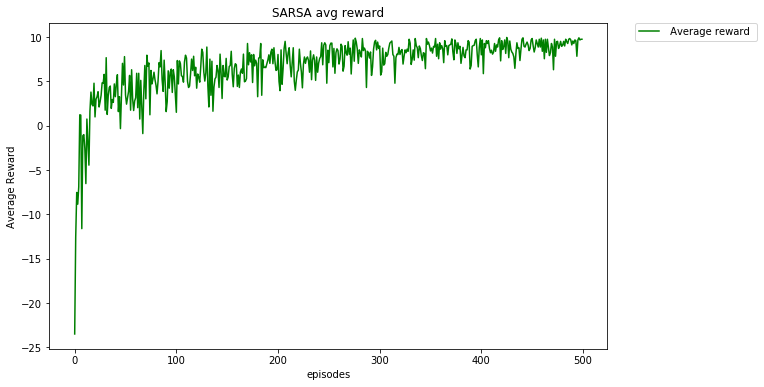

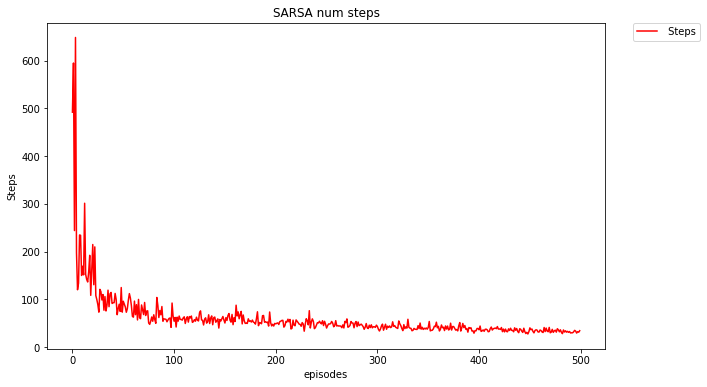

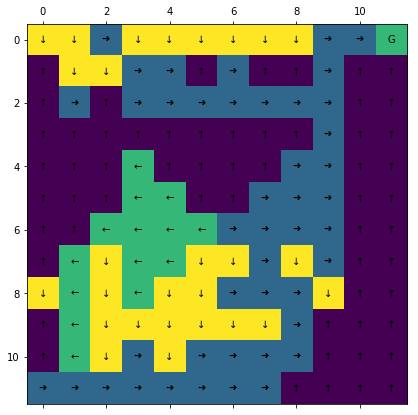

In [84]:
import multiprocessing as mp

if __name__ == '__main__':
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 500
        
    env = gym.make('gym_pdw:pdw-v0')
    sr = SARSA()

    pool = mp.Pool(processes = 4)
    data = [pool.apply(sr.sarsa,args=(gamma, alpha, epsilon, episodes,gym.make('gym_pdw:pdw-v0'),'A')) for i in range(50)] 
#     print(Data[0].)
    avg = np.zeros([episodes])
    stp = np.zeros([episodes])
    

    
    for i in range(episodes):
        for j in range(len(data)):
            avg[i] += data[j][0][i]/len(data)
            stp[i] += data[j][1][i]/len(data)

#         print(np.argmax(data[j][2], axis=0),"-------------------------------")

    pol = np.zeros([12,12])
    val = {0:0, 1:0, 2:0, 3:0}
    for i in range(12):
        for j in range(12):
            for k in range(len(data)):
                val[np.argmax(data[k][2], axis=0)[i,j]]+=1
            max_ = max(val, key=val.get)
            val = {0:0, 1:0, 2:0, 3:0}
            pol[i,j] = max_
    
#     pol += np.argmax(data[j][2], axis=0)
    print(np.argmax(data[k][2], axis=0))
    print(pol)
    goal_pos = [0,11]
#     pol = np.round(pol/len(data))
    plot_sarsa(avg, stp, episodes)
    plot_policy(goal_pos, pol)
    
        
        
        
    

In [ ]:
av

In [ ]:
print(env.grid)
print(env.goal_positions)
print(env.actions)
print(env.get_start_positions())


In [ ]:
np.argmax(Q, axis=0)


In [ ]:
Q.shape

In [ ]:
class SARSA:
    
    # Q function update 
    def update(self, curr_state, curr_action, reward, next_state, next_action, Q, alpha):

        error = reward + (gamma*Q[next_action][next_state[0],next_state[1]]) - Q[curr_action][curr_state[0],curr_state[1]]
        #     print(error, reward)
        Q[curr_action][curr_state[0],curr_state[1]] = Q[curr_action][curr_state[0],curr_state[1]] + alpha*error
    #     print(np.argmax(Q, axis = 0))
    #     if state == [1,11] and action==0:
    #         print("error =  ", error, "Q = ", Q[action][state[0],state[1]], "reward = ", reward,"cur_state=",state,"next_state = ",next_state,"action =", action)
        return Q
    
    
    # Epsilon-greedy action selection
    def select_action(self,epsilon, state, Q):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
#             print("rand", state,  action)
        else:
            action = np.argmax(Q[:,state[0],state[1]])
#             print("greedy",state,action)
        return action
    
    
    def sarsa(self, gamma, alpha, epsilon, episodes):
        
        # Initializing Q function values to zero
        Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])
    
        # Set the goal variant
        goal_pos = env.set_goal('A')
        Q[:,goal_pos[0],goal_pos[1]] = 10


        # Setting terminal action-state value 
        Terminal_state = goal_pos

        # Number of steps required to reach goal
        steps = np.zeros([episodes//50])
        avg_reward = np.zeros([episodes//50])

        p=0
        stp = 0
        rew = 0
        
        for episode in range(episodes):

            env.reset()
            curr_state = env.get_state()
#             print(curr_state)
            
            if episode%10==0:
                plot_policy(goal_pos,Q)

            
                
            cur_stp = 0
            cur_rew = 0
            
            
            while True:

                selected_action = self.select_action(epsilon, curr_state, Q)
                next_state, reward, curr_action = env.step(curr_state, selected_action)
                
                #                 print(next_state, curr_state,"======")
                print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)

                selected_next_action = self.select_action(epsilon, next_state, Q)
                next_action = env.actual_action(selected_next_action)

                Q = self.update(curr_state, curr_action, reward, next_state, next_action, Q, alpha)
    #             print("Q of current state is =", Q[:,curr_state[0],curr_state[1]])
#                 if curr_state==[1,11] and action == 0:
#                     print(curr_state, next_state)
#                     print(action, "------------",Q[action][1,11], "*************************************")
                stp+=1
                rew+=reward
                cur_stp+=1
                cur_rew+=reward
                
                
                curr_state = next_state
#                 st = env.get_start_positions()
    #             print(curr_state, "curr_state")

                if curr_state == goal_pos:
                    if episode%50==0:
                        print(p)
                        steps[p] = stp/50
                        avg_reward[p] = rew/50
                        p+=1
                        stp=0
                        rew=0
#                     print(avg_reward[episode])
                    print("Steps =======================", cur_stp)
                    print("reward=======================", cur_rew)
                    break

        return avg_reward, steps, Q

0 : [-1,0], # North
1 : [0,1], # East
2 : [0,-1], # West
3 : [1,0] # South 

In [ ]:
Q

In [ ]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

In [ ]:
env = gym.make('FrozenLake-v0')

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
Q

In [ ]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

In [ ]:
q = np.zeros([tuple([12,12]),0]) 

In [ ]:
q = np.zeros([12,12,4])
q[11,11][2]

In [ ]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


In [ ]:
Q = np.ones([4,12,12])
Q[1,11,11] = 5
Q[2,5,5] = 4
np.argmax(Q,axis=0)